# Measuring the height, width and frequency of a peak

In [1]:
using PyPlot, Spectra, Random

## Signal generation

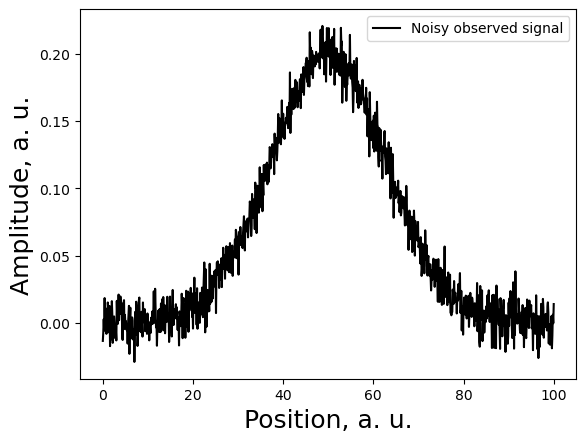

PyObject <matplotlib.legend.Legend object at 0x7f6ac05e4a30>

In [2]:
# the x axis
x = collect(0:0.1:100)

# a scale factor that you can change
scale = 0.01

# a fake signal: perfect y
y_tot, y_peaks = gaussiennes([20.],[50.],[15.],x)
y_perfect = scale.*y_tot

# we add noise: observed y
y = scale.*(y_tot + randn(size(y_tot,1)))

figure()
plot(x,y,"k-",label="Noisy observed signal")
xlabel("Position, a. u.",fontname="Sans",fontsize = 18)
ylabel("Amplitude, a. u.", fontname = "Sans", fontsize = 18)
legend()

## Estimates are done with the peakmeas function on a smoothed signal.

In [3]:
height_y, hwhm_y, position_y, centroid_y, smoothed_y = peakmeas(x,vec(y),smoothing = "yes", method= "savgol",  y_smo_out = true)

println("Estimated peak height is $(height_y)")
println("Estimated peak hwhm is $(hwhm_y)")
println("Estimated peak position is $(position_y)")
println("Estimated peak centroid is $(centroid_y)")


Estimated peak height is 0.2008881348994855
Estimated peak hwhm is 49.6
Estimated peak position is 14.95
Estimated peak centroid is 50.055596767046694


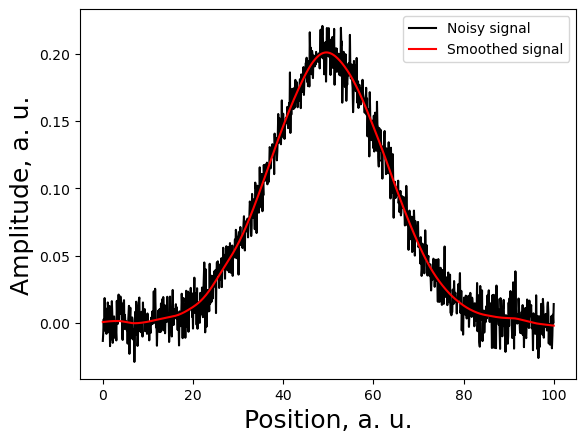

PyObject <matplotlib.legend.Legend object at 0x7f6ac048cdc0>

In [4]:
figure()
plot(x,y,"k-",label="Noisy signal")
plot(x,smoothed_y,"r-",label="Smoothed signal")
xlabel("Position, a. u.",fontname="Sans",fontsize = 18)
ylabel("Amplitude, a. u.", fontname = "Sans", fontsize = 18)
legend()

## It also is possible to estimate directly the centroid using the `centroid` function

In [5]:
centroid2 = centroid(x,vec(y))

println("Estimated peak centroid is $(centroid2)")


Estimated peak centroid is [50.05559676703918]
